### Import Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
coursedata = pd.read_csv("/content/drive/MyDrive/DSCI:560 Project/Datasets/coursera_data_course_level.csv")
coursedata.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details
0,"Cloud Computing Concepts, Part 1",Beginner Level,Approx. 23 hours to complete,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.4\nstars,University of Illinois at Urbana-Champaign,English,"['Week 1: Orientation, Introduction to Clouds,...",['This course is oriented towards learners wit...
1,The Challenges of Global Health,Beginner Level,Approx. 20 hours to complete,[],['Dr. David Boyd'],What are the world’s major health challenges? ...,4.8\nstars,Duke University,English,"['Getting Started', 'Basic Concepts in Global ...","['Start here! ', 'This module covers some of t..."
2,Digital Marketing Analytics in Theory,Beginner Level,Approx. 20 hours to complete,"['Digital Marketing', 'Data Collection', 'Anal...",['Kevin Hartman'],Successfully marketing brands today requires a...,4.5\nstars,University of Illinois at Urbana-Champaign,English,['Course Overview and The Day The Geeks Took O...,"['In the orientation, you will become familiar..."
3,Digital Product Management: Modern Fundamentals,Beginner Level,Approx. 11 hours to complete,"['Product/Market Fit', 'Product Management', '...",['Alex Cowan'],"Not so long ago, the job of product manager wa...",4.7\nstars,University of Virginia,English,"['Achieving Focus and #Winning', ""Using Today'...","['As a product manager, you and your team will..."
4,The Nature of Genius,Beginner Level,Approx. 28 hours to complete,"['Creativity', 'Art', 'History', 'Psychology',...",['Craig Wright\nTOP INSTRUCTOR'],"Today ""genius"" is all around us. Celebrities, ...",NaN,Yale University,English,"['Genius Defined, Genius Denied , Genius an...","['In Section 1 of Module 1 we determine, jokin..."


### Data Summary


In [ ]:
coursedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   course_title      6134 non-null   object
 1   difficulty_level  4736 non-null   object
 2   duration          6096 non-null   object
 3   skills            6636 non-null   object
 4   instructors       6636 non-null   object
 5   description       6635 non-null   object
 6   rating            4651 non-null   object
 7   offered_by        6636 non-null   object
 8   language          6636 non-null   object
 9   syllabus_heading  6636 non-null   object
 10  syllabus_details  6636 non-null   object
dtypes: object(11)
memory usage: 570.4+ KB


In [ ]:
coursedata.describe()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details
count,6134,4736,6096,6636,6636,6635,4651,6636,6636,6636,6636
unique,6117,3,85,2990,3159,6126,21,261,21,5943,5440
top,Leadership,Beginner Level,Approx. 12 hours to complete,[],[],We help millions of organizations empower thei...,4.8\nstars,Google Cloud,English,[],[]
freq,3,3057,330,3437,504,502,1186,739,4824,540,539


In [ ]:
coursedata.columns

Index(['course_title', 'difficulty_level', 'duration', 'skills', 'instructors', 'description', 'rating', 'offered_by', 'language', 'syllabus_heading', 'syllabus_details'], dtype='object')

In [ ]:
coursedata.dtypes

course_title        object
difficulty_level    object
duration            object
skills              object
instructors         object
description         object
rating              object
offered_by          object
language            object
syllabus_heading    object
syllabus_details    object
dtype: object

### Data Preprocessing

In [ ]:
coursedata['difficulty_level'].value_counts()

Beginner Level        3057
Intermediate Level    1489
Advanced Level         190
Name: difficulty_level, dtype: int64

In [ ]:
coursedata.shape

(6636, 11)

In [ ]:
#Replace NAN values intially with "0"
#Extracting hours 
#Replaces "0" with median value
coursedata['duration'].fillna("0",inplace=True)
coursedata['duration'].value_counts().sum()

6636

In [ ]:
hours = coursedata['duration'].astype('str').str.extractall('(\d+)').unstack().sum(axis=1).astype(int)
coursedata['duration'] = hours
coursedata.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details
0,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.4\nstars,University of Illinois at Urbana-Champaign,English,"['Week 1: Orientation, Introduction to Clouds,...",['This course is oriented towards learners wit...
1,The Challenges of Global Health,Beginner Level,20,[],['Dr. David Boyd'],What are the world’s major health challenges? ...,4.8\nstars,Duke University,English,"['Getting Started', 'Basic Concepts in Global ...","['Start here! ', 'This module covers some of t..."
2,Digital Marketing Analytics in Theory,Beginner Level,20,"['Digital Marketing', 'Data Collection', 'Anal...",['Kevin Hartman'],Successfully marketing brands today requires a...,4.5\nstars,University of Illinois at Urbana-Champaign,English,['Course Overview and The Day The Geeks Took O...,"['In the orientation, you will become familiar..."
3,Digital Product Management: Modern Fundamentals,Beginner Level,11,"['Product/Market Fit', 'Product Management', '...",['Alex Cowan'],"Not so long ago, the job of product manager wa...",4.7\nstars,University of Virginia,English,"['Achieving Focus and #Winning', ""Using Today'...","['As a product manager, you and your team will..."
4,The Nature of Genius,Beginner Level,28,"['Creativity', 'Art', 'History', 'Psychology',...",['Craig Wright\nTOP INSTRUCTOR'],"Today ""genius"" is all around us. Celebrities, ...",NaN,Yale University,English,"['Genius Defined, Genius Denied , Genius an...","['In Section 1 of Module 1 we determine, jokin..."


In [ ]:
coursedata['duration'].shape

(6636,)

In [ ]:
print(coursedata['duration'].median())

13.0


In [ ]:
# coursedata['duration'].value_counts()

In [ ]:

coursedata['duration']=coursedata['duration'].replace(0,int(coursedata['duration'].median()))
coursedata.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details
0,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.4\nstars,University of Illinois at Urbana-Champaign,English,"['Week 1: Orientation, Introduction to Clouds,...",['This course is oriented towards learners wit...
1,The Challenges of Global Health,Beginner Level,20,[],['Dr. David Boyd'],What are the world’s major health challenges? ...,4.8\nstars,Duke University,English,"['Getting Started', 'Basic Concepts in Global ...","['Start here! ', 'This module covers some of t..."
2,Digital Marketing Analytics in Theory,Beginner Level,20,"['Digital Marketing', 'Data Collection', 'Anal...",['Kevin Hartman'],Successfully marketing brands today requires a...,4.5\nstars,University of Illinois at Urbana-Champaign,English,['Course Overview and The Day The Geeks Took O...,"['In the orientation, you will become familiar..."
3,Digital Product Management: Modern Fundamentals,Beginner Level,11,"['Product/Market Fit', 'Product Management', '...",['Alex Cowan'],"Not so long ago, the job of product manager wa...",4.7\nstars,University of Virginia,English,"['Achieving Focus and #Winning', ""Using Today'...","['As a product manager, you and your team will..."
4,The Nature of Genius,Beginner Level,28,"['Creativity', 'Art', 'History', 'Psychology',...",['Craig Wright\nTOP INSTRUCTOR'],"Today ""genius"" is all around us. Celebrities, ...",NaN,Yale University,English,"['Genius Defined, Genius Denied , Genius an...","['In Section 1 of Module 1 we determine, jokin..."


In [ ]:
coursedata['duration'].value_counts()

13     859
12     330
10     329
9      314
11     311
15     297
14     289
8      277
16     243
7      236
6      230
18     230
19     212
17     209
20     202
22     161
5      158
21     147
2      141
4      138
23     125
25     114
24     100
27      96
3       96
26      94
28      76
29      63
33      54
31      51
32      47
30      47
35      34
1       30
34      27
40      27
38      25
37      21
47      17
42      15
36      15
46      12
41      10
39      10
44       9
43       9
45       9
54       7
49       7
66       6
53       5
60       5
55       4
56       4
71       4
48       3
59       3
65       3
50       3
93       2
69       2
51       2
72       2
57       2
73       2
63       2
61       2
67       2
76       2
81       1
58       1
96       1
104      1
80       1
68       1
90       1
64       1
78       1
106      1
85       1
88       1
310      1
62       1
70       1
127      1
Name: duration, dtype: int64

In [ ]:
coursedata['difficulty_level'].isnull().sum()

1900

In [ ]:
#@title
#Replacing blank values of difficulty level with Unknown 
coursedata["difficulty_level"].fillna("Unknown", inplace = True)
coursedata["difficulty_level"].value_counts()

Beginner Level        3057
Unknown               1900
Intermediate Level    1489
Advanced Level         190
Name: difficulty_level, dtype: int64

In [ ]:
diff_lvl_dict = {'Beginner Level':1 , 'Intermediate Level':2, 'Advanced Level':3, 'Unknown':0}
coursedata['numeric_difficulty_lvl'] = coursedata.difficulty_level.map(diff_lvl_dict)
coursedata['numeric_difficulty_lvl'].value_counts()

1    3057
0    1900
2    1489
3     190
Name: numeric_difficulty_lvl, dtype: int64

In [ ]:
coursedata.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details,numeric_difficulty_lvl
0,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.4\nstars,University of Illinois at Urbana-Champaign,English,"['Week 1: Orientation, Introduction to Clouds,...",['This course is oriented towards learners wit...,1
1,The Challenges of Global Health,Beginner Level,20,[],['Dr. David Boyd'],What are the world’s major health challenges? ...,4.8\nstars,Duke University,English,"['Getting Started', 'Basic Concepts in Global ...","['Start here! ', 'This module covers some of t...",1
2,Digital Marketing Analytics in Theory,Beginner Level,20,"['Digital Marketing', 'Data Collection', 'Anal...",['Kevin Hartman'],Successfully marketing brands today requires a...,4.5\nstars,University of Illinois at Urbana-Champaign,English,['Course Overview and The Day The Geeks Took O...,"['In the orientation, you will become familiar...",1
3,Digital Product Management: Modern Fundamentals,Beginner Level,11,"['Product/Market Fit', 'Product Management', '...",['Alex Cowan'],"Not so long ago, the job of product manager wa...",4.7\nstars,University of Virginia,English,"['Achieving Focus and #Winning', ""Using Today'...","['As a product manager, you and your team will...",1
4,The Nature of Genius,Beginner Level,28,"['Creativity', 'Art', 'History', 'Psychology',...",['Craig Wright\nTOP INSTRUCTOR'],"Today ""genius"" is all around us. Celebrities, ...",NaN,Yale University,English,"['Genius Defined, Genius Denied , Genius an...","['In Section 1 of Module 1 we determine, jokin...",1


In [ ]:
coursedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   course_title            6134 non-null   object
 1   difficulty_level        6636 non-null   object
 2   duration                6636 non-null   int64 
 3   skills                  6636 non-null   object
 4   instructors             6636 non-null   object
 5   description             6635 non-null   object
 6   rating                  4651 non-null   object
 7   offered_by              6636 non-null   object
 8   language                6636 non-null   object
 9   syllabus_heading        6636 non-null   object
 10  syllabus_details        6636 non-null   object
 11  numeric_difficulty_lvl  6636 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 622.2+ KB


Text(0.5, 1.0, 'NUMBER OF COURSES FOR DIFFERENT DURATION')

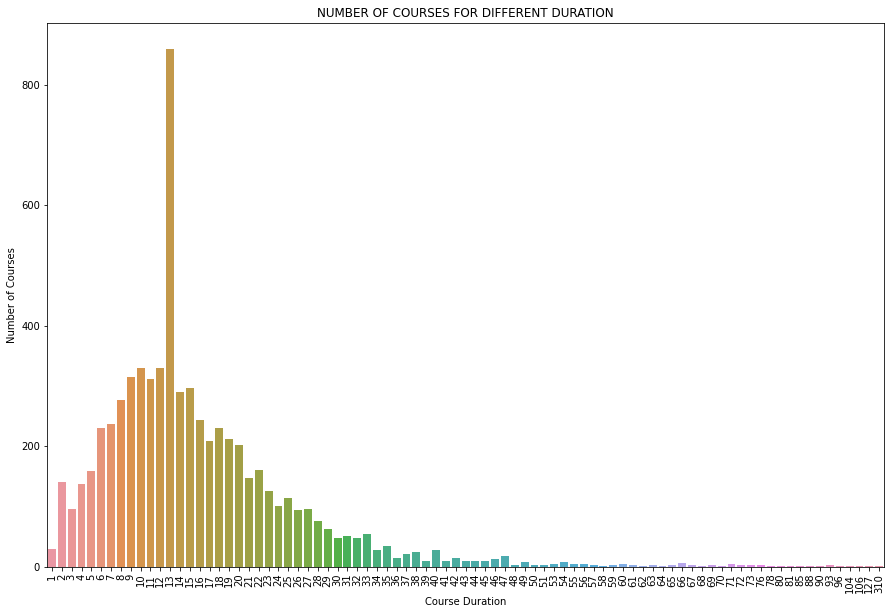

In [ ]:
#Course Duration Distribution throughout the data
#Rating Distribution throughout the data
import seaborn as sns
plt.figure(figsize=(15,10)) 
sns.countplot(x='duration', data=coursedata)
plt.xlabel('Course Duration')
plt.xticks(rotation=90)
plt.ylabel('Number of Courses')
plt.title('NUMBER OF COURSES FOR DIFFERENT DURATION')

In [ ]:
def label_race (row):
   if row['duration'] <= 10 :
      return 'Short Course Duration'
   if row['duration'] > 10 and row['duration'] <= 35 :
      return 'Medium Course  Duration'
   if row['duration'] >35 and row['duration'] <=70 :
      return 'Long Course Duration'
   if row['duration'] >70  :
      return 'Very Long Course Duration'

In [ ]:
coursedata['duration_label'] = coursedata.apply (lambda row: label_race(row), axis=1)

In [ ]:
coursedata["duration_label"].value_counts()

Medium Course  Duration      4418
Short Course Duration        1949
Long Course Duration          246
Very Long Course Duration      23
Name: duration_label, dtype: int64

In [ ]:
coursedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   course_title            6134 non-null   object
 1   difficulty_level        6636 non-null   object
 2   duration                6636 non-null   int64 
 3   skills                  6636 non-null   object
 4   instructors             6636 non-null   object
 5   description             6635 non-null   object
 6   rating                  4651 non-null   object
 7   offered_by              6636 non-null   object
 8   language                6636 non-null   object
 9   syllabus_heading        6636 non-null   object
 10  syllabus_details        6636 non-null   object
 11  numeric_difficulty_lvl  6636 non-null   int64 
 12  duration_label          6636 non-null   object
dtypes: int64(2), object(11)
memory usage: 674.1+ KB


In [ ]:
coursedata.head()

,course_title,difficulty_level,duration,skills,instructors,description,rating,offered_by,language,syllabus_heading,syllabus_details,numeric_difficulty_lvl,duration_label
0,"Cloud Computing Concepts, Part 1",Beginner Level,23,"['Distributed Algorithm', 'Distributed Computi...",['Indranil Gupta'],"Cloud computing systems today, whether open-so...",4.4\nstars,University of Illinois at Urbana-Champaign,English,"['Week 1: Orientation, Introduction to Clouds,...",['This course is oriented towards learners wit...,1,Medium Course Duration
1,The Challenges of Global Health,Beginner Level,20,[],['Dr. David Boyd'],What are the world’s major health challenges? ...,4.8\nstars,Duke University,English,"['Getting Started', 'Basic Concepts in Global ...","['Start here! ', 'This module covers some of t...",1,Medium Course Duration
2,Digital Marketing Analytics in Theory,Beginner Level,20,"['Digital Marketing', 'Data Collection', 'Anal...",['Kevin Hartman'],Successfully marketing brands today requires a...,4.5\nstars,University of Illinois at Urbana-Champaign,English,['Course Overview and The Day The Geeks Took O...,"['In the orientation, you will become familiar...",1,Medium Course Duration
3,Digital Product Management: Modern Fundamentals,Beginner Level,11,"['Product/Market Fit', 'Product Management', '...",['Alex Cowan'],"Not so long ago, the job of product manager wa...",4.7\nstars,University of Virginia,English,"['Achieving Focus and #Winning', ""Using Today'...","['As a product manager, you and your team will...",1,Medium Course Duration
4,The Nature of Genius,Beginner Level,28,"['Creativity', 'Art', 'History', 'Psychology',...",['Craig Wright\nTOP INSTRUCTOR'],"Today ""genius"" is all around us. Celebrities, ...",NaN,Yale University,English,"['Genius Defined, Genius Denied , Genius an...","['In Section 1 of Module 1 we determine, jokin...",1,Medium Course Duration


In [ ]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
coursedata['combined_text'] = " CaliRollB " + coursedata["course_title"] + " CaliRollA " + coursedata["difficulty_level"] +  coursedata["skills"] +  coursedata["instructors"] +  \
                              coursedata["description"] +  coursedata["offered_by"] +  coursedata["language"] +  coursedata["syllabus_heading"] +  \
                              coursedata["syllabus_details"] +  coursedata["duration_label"]
coursedata['combined_text'][0]

' CaliRollB Cloud Computing Concepts, Part 1 CaliRollA Beginner Level[\'Distributed Algorithm\', \'Distributed Computing\', \'C++\', \'Cloud Computing\'][\'Indranil Gupta\']Cloud computing systems today, whether open-source or used inside companies, are built using a common set of core techniques, algorithms, and design philosophies – all centered around distributed systems. Learn about such fundamental distributed computing "concepts" for cloud computing. Some of these concepts include: clouds, MapReduce, key-value/NoSQL stores, classical distributed algorithms, widely-used distributed algorithms, scalability, trending areas, and much, much more! \n \nKnow how these systems work from the inside out. Get your hands dirty using these concepts with provided homework exercises. In the programming assignments, implement some of these concepts in template code (programs) provided in the C++ programming language. Prior experience with C++ is required.\n \nThe course also features interviews 

In [ ]:
coursedata['combined_text'][0]

' CaliRollB Cloud Computing Concepts, Part 1 CaliRollA Beginner Level[\'Distributed Algorithm\', \'Distributed Computing\', \'C++\', \'Cloud Computing\'][\'Indranil Gupta\']Cloud computing systems today, whether open-source or used inside companies, are built using a common set of core techniques, algorithms, and design philosophies – all centered around distributed systems. Learn about such fundamental distributed computing "concepts" for cloud computing. Some of these concepts include: clouds, MapReduce, key-value/NoSQL stores, classical distributed algorithms, widely-used distributed algorithms, scalability, trending areas, and much, much more! \n \nKnow how these systems work from the inside out. Get your hands dirty using these concepts with provided homework exercises. In the programming assignments, implement some of these concepts in template code (programs) provided in the C++ programming language. Prior experience with C++ is required.\n \nThe course also features interviews 

#Data Cleaning

In [ ]:
#Importing Necessary Libraries for Text Processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#Downloading Stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Load English Stop Words
stopword = stopwords.words('english')
print("Stopwords:",stopword)

Stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

In [ ]:
#Clean Function
def clean_text(twee):
    #Remove URL
    twee = re.sub(r'https?://\S+|www\.\S+', " ", twee)

    #Remove Mentions
    twee = re.sub(r'@\w+',' ',twee)

    #Remove Punctuation
    twee= re.sub(r'[^\w\s\d\$]',' ',twee)

    #Remove Digits
    twee = re.sub(r'\d+', ' ', twee)

    #Remove HTML tags
    twee = re.sub('r<.*?>',' ', twee)

    #Remove Hastags
    twee = re.sub(r'#\w+', ' ', twee)

    #Remove Stop Words 
    twee = twee.split()
    #twee = " ".join(twee)
    
    twee = " ".join([word for word in twee if not word in stopword])

    return twee

In [ ]:
#Applying Tweet Clean Function to Both Files
coursedata['clean_combined_text'] = coursedata['combined_text'].astype(str).apply(lambda x: clean_text(x))

In [ ]:
coursedata['combined_text'][0]

' CaliRollB Cloud Computing Concepts, Part 1 CaliRollA Beginner Level[\'Distributed Algorithm\', \'Distributed Computing\', \'C++\', \'Cloud Computing\'][\'Indranil Gupta\']Cloud computing systems today, whether open-source or used inside companies, are built using a common set of core techniques, algorithms, and design philosophies – all centered around distributed systems. Learn about such fundamental distributed computing "concepts" for cloud computing. Some of these concepts include: clouds, MapReduce, key-value/NoSQL stores, classical distributed algorithms, widely-used distributed algorithms, scalability, trending areas, and much, much more! \n \nKnow how these systems work from the inside out. Get your hands dirty using these concepts with provided homework exercises. In the programming assignments, implement some of these concepts in template code (programs) provided in the C++ programming language. Prior experience with C++ is required.\n \nThe course also features interviews 

In [ ]:
coursedata['clean_combined_text'][0]

'CaliRollB Cloud Computing Concepts Part CaliRollA Beginner Level Distributed Algorithm Distributed Computing C Cloud Computing Indranil Gupta Cloud computing systems today whether open source used inside companies built using common set core techniques algorithms design philosophies centered around distributed systems Learn fundamental distributed computing concepts cloud computing Some concepts include clouds MapReduce key value NoSQL stores classical distributed algorithms widely used distributed algorithms scalability trending areas much much Know systems work inside Get hands dirty using concepts provided homework exercises In programming assignments implement concepts template code programs provided C programming language Prior experience C required The course also features interviews leading researchers managers industry academia The University Illinois Urbana Champaign world leader research teaching public engagement distinguished breadth programs broad academic excellence inte

In [ ]:
coursedata2 = coursedata[coursedata.clean_combined_text.map(lambda x: x.isascii())]

In [ ]:
coursedata2['clean_combined_text'][0]

'CaliRollB Cloud Computing Concepts Part CaliRollA Beginner Level Distributed Algorithm Distributed Computing C Cloud Computing Indranil Gupta Cloud computing systems today whether open source used inside companies built using common set core techniques algorithms design philosophies centered around distributed systems Learn fundamental distributed computing concepts cloud computing Some concepts include clouds MapReduce key value NoSQL stores classical distributed algorithms widely used distributed algorithms scalability trending areas much much Know systems work inside Get hands dirty using concepts provided homework exercises In programming assignments implement concepts template code programs provided C programming language Prior experience C required The course also features interviews leading researchers managers industry academia The University Illinois Urbana Champaign world leader research teaching public engagement distinguished breadth programs broad academic excellence inte

In [ ]:
#courseinfo[0]

In [ ]:
coursedata2 = coursedata2.dropna()

In [ ]:
course_text = coursedata2[['clean_combined_text']]
course_text['index'] = course_text.index
documents = course_text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
documents

,clean_combined_text,index
0,CaliRollB Cloud Computing Concepts Part CaliRo...,0
1,CaliRollB The Challenges Global Health CaliRol...,1
2,CaliRollB Digital Marketing Analytics Theory C...,2
3,CaliRollB Digital Product Management Modern Fu...,3
7,CaliRollB Grow Your Business Goldman Sachs Wom...,7
...,...,...
6611,CaliRollB Introduction XR VR AR MR Foundations...,6611
6616,CaliRollB Global Adolescent Health CaliRollA B...,6616
6617,CaliRollB The Science Training Young Athletes ...,6617
6622,CaliRollB Getting Started Mainframe z OS Comma...,6622


In [ ]:
course_clean_1 = documents['clean_combined_text'].reset_index(drop=True)

In [ ]:
course_clean_1

0       CaliRollB Cloud Computing Concepts Part CaliRo...
1       CaliRollB The Challenges Global Health CaliRol...
2       CaliRollB Digital Marketing Analytics Theory C...
3       CaliRollB Digital Product Management Modern Fu...
4       CaliRollB Grow Your Business Goldman Sachs Wom...
                              ...                        
3185    CaliRollB Introduction XR VR AR MR Foundations...
3186    CaliRollB Global Adolescent Health CaliRollA B...
3187    CaliRollB The Science Training Young Athletes ...
3188    CaliRollB Getting Started Mainframe z OS Comma...
3189    CaliRollB IBM z OS Rexx Programming CaliRollA ...
Name: clean_combined_text, Length: 3190, dtype: object

In [ ]:
course_clean = course_clean_1

In [ ]:
#def text_one_liner(books_list):
#    for x in range(len(books_list)):
#        books_list[x] = books_list[x].replace('\n', ' ')
#    return books_list

#course_clean = text_one_liner(course_clean_1)

In [ ]:
len(course_clean)

3190

In [ ]:
#documents['clean_combined_text']

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def lemmatize_stemming(text):
    return text #stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
processed_docs = course_clean.map(preprocess)
processed_docs[:10]

0    [calirollb, cloud, computing, concepts, caliro...
1    [calirollb, challenges, global, health, caliro...
2    [calirollb, digital, marketing, analytics, the...
3    [calirollb, digital, product, management, mode...
4    [calirollb, grow, business, goldman, sachs, wo...
5    [calirollb, fundamentals, negotiation, goldman...
6    [calirollb, fundamentals, business, finance, g...
7    [calirollb, fundamentals, leadership, goldman,...
8    [calirollb, fundamentals, customers, competiti...
9    [calirollb, fundamentals, financial, planning,...
Name: clean_combined_text, dtype: object

#TF-IDF
Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 academia
1 academic
2 agree
3 algorithm
4 algorithms
5 allows
6 alumni
7 analysis
8 analyzes
9 apache
10 applications


Filter out tokens that appear in

*   Less than 15 documents (absolute number) or
*   more than 0.5 documents (fraction of total corpus size, not absolute number)
*   after the above two steps, keep only the first 100000 most frequent tokens.

In [ ]:
#dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=100000)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 9),
 (5, 1),
 (6, 1),
 (7, 2),
 (8, 2),
 (9, 2),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 2),
 (16, 2),
 (17, 2),
 (18, 4),
 (19, 1),
 (20, 2),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 2),
 (28, 3),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 2),
 (33, 1),
 (34, 2),
 (35, 4),
 (36, 2),
 (37, 4),
 (38, 13),
 (39, 3),
 (40, 1),
 (41, 1),
 (42, 2),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 2),
 (47, 2),
 (48, 13),
 (49, 7),
 (50, 1),
 (51, 4),
 (52, 2),
 (53, 6),
 (54, 1),
 (55, 4),
 (56, 3),
 (57, 1),
 (58, 10),
 (59, 1),
 (60, 3),
 (61, 2),
 (62, 2),
 (63, 2),
 (64, 11),
 (65, 2),
 (66, 4),
 (67, 2),
 (68, 1),
 (69, 1),
 (70, 17),
 (71, 1),
 (72, 2),
 (73, 1),
 (74, 1),
 (75, 2),
 (76, 2),
 (77, 2),
 (78, 2),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 4),
 (84, 3),
 (85, 2),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 2),
 (92, 1),
 (93, 2),
 (94, 3),
 (95, 2),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 2),
 (100

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.025279235088450543),
 (1, 0.007424820929714573),
 (2, 0.028529141522810313),
 (3, 0.020869386840328897),
 (4, 0.14421723155962857),
 (5, 0.017879192637467428),
 (6, 0.014243588345844105),
 (7, 0.01627167716748426),
 (8, 0.06907573760065587),
 (9, 0.057785574270938424),
 (10, 0.009550121530161855),
 (11, 0.0066082058341978495),
 (12, 0.014669173896139993),
 (13, 0.0425080297370977),
 (14, 0.016702704478361582),
 (15, 0.06221747476366473),
 (16, 0.06819786316938767),
 (17, 0.03672175251873881),
 (18, 0.09947454697844448),
 (19, 0.004834555830897672),
 (20, 0.10265545246668198),
 (21, 0.018432764777910095),
 (22, 0.013968924130498672),
 (23, 0.018149959721788313),
 (24, 0.02142295898077157),
 (27, 0.08217675138367504),
 (28, 0.08971430175770827),
 (29, 0.035009348625016735),
 (30, 0.02352900974444924),
 (31, 0.019492288580486),
 (32, 0.06907573760065587),
 (33, 0.0425080297370977),
 (34, 0.035758385274934856),
 (35, 0.10069629830087866),
 (36, 0.07985686775615129),
 (37, 0.16435350

#Topic Number

In [ ]:
from gensim import corpora, models, similarities
import random
import os
from gensim.models import CoherenceModel
coherence_val = []
topicnums = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70]
project_folder = os.getcwd()

ldamodels_bow = {}
for i in topicnums:
    random.seed(42) 
    if not os.path.exists('/content/drive/MyDrive/DSCI:560 Project/finallda_models_tfidf/ldamodels_tfidf_'+str(i)+'.lda'):
        %time ldamodels_bow[i] = models.LdaModel(corpus_tfidf, num_topics=i, random_state=42, update_every=1, passes=10, id2word=dictionary)
        ldamodels_bow[i].save('/content/drive/MyDrive/DSCI:560 Project/finallda_models_tfidf/ldamodels_tfidf_'+str(i)+'.lda')
        print('finalldamodels_tfidf_{}.lda created.'.format(i))
        coherence_model_lda = CoherenceModel(model=ldamodels_bow[i], texts=processed_docs, dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        print('Coherence Score: ', coherence_lda)
        coherence_val.append(coherence_lda)
    else: 
        print('finalldamodels_tfidf_{}.lda already exists.'.format(i))


CPU times: user 33.5 s, sys: 379 ms, total: 33.8 s
Wall time: 33.8 s
finalldamodels_tfidf_1.lda created.
Coherence Score:  0.31320522629740977
CPU times: user 38.3 s, sys: 219 ms, total: 38.5 s
Wall time: 38.6 s
finalldamodels_tfidf_5.lda created.
Coherence Score:  0.4865744818541165
CPU times: user 38.7 s, sys: 185 ms, total: 38.9 s
Wall time: 38.9 s
finalldamodels_tfidf_10.lda created.
Coherence Score:  0.5792985478425415
CPU times: user 40 s, sys: 2.06 s, total: 42 s
Wall time: 40 s
finalldamodels_tfidf_15.lda created.
Coherence Score:  0.5939631874165244
CPU times: user 46.6 s, sys: 9.84 s, total: 56.4 s
Wall time: 45.8 s
finalldamodels_tfidf_20.lda created.
Coherence Score:  0.587187963098512
CPU times: user 53.9 s, sys: 21.4 s, total: 1min 15s
Wall time: 51.3 s
finalldamodels_tfidf_25.lda created.
Coherence Score:  0.5874316932143413
CPU times: user 55.6 s, sys: 24.4 s, total: 1min 19s
Wall time: 53.6 s
finalldamodels_tfidf_30.lda created.
Coherence Score:  0.567978634324987
CPU 

In [ ]:
import pickle
lda_topics = {}
for i in topicnums:
    lda_model = models.LdaModel.load('/content/drive/MyDrive/DSCI:560 Project/finallda_models_tfidf/ldamodels_tfidf_'+str(i)+'.lda')
    lda_topics_string = lda_model.show_topics(i)
    lda_topics[i] = ["".join([c if c.isalpha() else " " for c in topic[1]]).split() for topic in lda_topics_string]

pickle.dump(lda_topics,open('/content/drive/MyDrive/DSCI:560 Project/finallda_models_tfidf/pub_finallda_tfidf_topics.pkl','wb'))

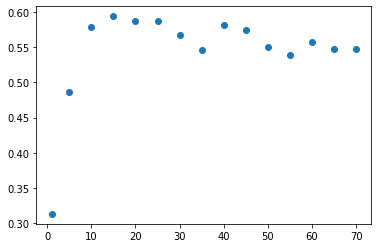

In [ ]:
import matplotlib.pyplot as plt
#coherence_val, topicnums
plt.scatter(topicnums, coherence_val)
plt.show()

#Optimal Model

In [ ]:
num_topics = 15
lda_model_final = models.LdaModel.load('/content/drive/MyDrive/DSCI:560 Project/finallda_models_tfidf/ldamodels_tfidf_'+str(num_topics)+'.lda')

In [ ]:
from pprint import pprint
top_topics = lda_model_final.top_topics(corpus_tfidf, topn=10)

avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

counter = 0
for topic in top_topics:
    print('Topic {}:'.format(counter))
    counter += 1
    pprint(topic)
    
pickle.dump(lda_topics,open('/content/drive/MyDrive/DSCI:560 Project/finallda_models_tfidf/pub_finallda_tfidf_topics.pkl','wb'))

Average topic coherence: -17.0902.
Topic 0:
([(0.004426769, 'data'),
  (0.0034905723, 'week'),
  (0.003088333, 'module'),
  (0.002197175, 'design'),
  (0.0020864774, 'cloud'),
  (0.0019097304, 'business'),
  (0.0018648901, 'project'),
  (0.0017826763, 'health'),
  (0.001765907, 'python'),
  (0.001664618, 'social')],
 -1.6664690385518302)
Topic 1:
([(0.004408959, 'music'),
  (0.0028471383, 'salesforce'),
  (0.0024911507, 'china'),
  (0.0022618927, 'informatics'),
  (0.0020141813, 'chinese'),
  (0.0018909555, 'linux'),
  (0.0017700873, 'brain'),
  (0.0014661561, 'religion'),
  (0.0014501085, 'perspectives'),
  (0.0014379356, 'sales')],
 -13.39200471230682)
Topic 2:
([(0.0028306444, 'mining'),
  (0.0023043926, 'spark'),
  (0.0020482368, 'calculus'),
  (0.0019353583, 'pipelines'),
  (0.0015585156, 'streaming'),
  (0.0014899736, 'django'),
  (0.0014266537, 'apache'),
  (0.0014205328, 'circuits'),
  (0.0013972353, 'arctic'),
  (0.001287653, 'circuit')],
 -15.364745433243934)
Topic 3:
([(0.00

In [ ]:
corpus_lda_model = lda_model_final[corpus_tfidf]
for article in corpus_lda_model[0]:
    print(article)

(0, 0.34167325)
(1, 0.013473515)
(7, 0.022456234)
(14, 0.5600711)


In [ ]:
#Recommendet System

In [ ]:
index = similarities.MatrixSimilarity(lda_model_final[corpus_tfidf])

In [ ]:
def course_recommender(title):
    course_checked = 0
    for i in range(len(course_clean)):
        recommendation_scores = []
        #if course_clean[i] == title:
        lda_vectors = corpus_lda_model[i]
        sims = index[lda_vectors]
        sims = list(enumerate(sims))
        for sim in sims:
          course_num = sim[0]
          recommendation_score = [course_clean[course_num], sim[1]]
          recommendation_scores.append(recommendation_score)
            
        recommendation = sorted(recommendation_scores, key=lambda x: x[1], reverse=True)
        print("Your book's most prominent tokens are:")
        article_tokens = corpus_tfidf[i]
        sorted_tokens = sorted(article_tokens, key=lambda x: x[1], reverse=True)
        sorted_tokens_10 = sorted_tokens[:10]
        for i in range(len(sorted_tokens_10)):
          print("Word {} (\"{}\") appears {} time(s).".format(sorted_tokens_10[i][0], 
                                                             dictionary[sorted_tokens_10[i][0]], 
                                                             sorted_tokens_10[i][1]))
        print('-----')
        print("Your book's most prominant topic is:")
        print(lda_model_final.print_topic(max(lda_vectors, key=lambda item: item[1])[0]))
        print('-----')
        print('Here are your recommendations for "{}":'.format(title))
        display(recommendation[1:11])

In [ ]:
#course_recommender("Digital marketing courses")

In [ ]:
unseen_document = 'machine learning'

In [ ]:
bow_vector = dictionary.doc2bow(preprocess(unseen_document)) 
tfidf_vector = tfidf[bow_vector]
tfidf_vector_ordered = sorted(tfidf_vector, key=lambda x: x[1], reverse=True)
print(tfidf_vector_ordered[:10])

#bow_vector_ordered = sorted(bow_vector, key=lambda x: x[1], reverse=True)
#print(bow_vector_ordered[:10])

[(2561, 0.9536691529084148), (405, 0.30085735289493354)]


In [ ]:
lda_vector_other = lda_model_final[tfidf_vector_ordered]
#lda_vector_other = lda_model_final[bow_vector_ordered]
print(lda_vector_other)

[(0, 0.029570142), (1, 0.029570142), (2, 0.029570142), (3, 0.029570142), (4, 0.029570142), (5, 0.029570142), (6, 0.029570142), (7, 0.029570142), (8, 0.029570142), (9, 0.029570142), (10, 0.029570142), (11, 0.029570142), (12, 0.029570142), (13, 0.029570142), (14, 0.586018)]


In [ ]:
sims = index[lda_vector_other]
sims = list(enumerate(sims))
recommendation_scores_1 = []



In [ ]:
len(sims)

3190

In [ ]:
len(course_clean)

3190

In [ ]:
for sim in sims:
    course_num = sim[0]
    recommendation_score_1 = [course_clean[course_num], sim[1]]
    recommendation_scores_1.append(recommendation_score_1)

#recommendation_2 = recommendation_scores_1
recommendation_2 = sorted(recommendation_scores_1, key=lambda x: x[1], reverse=True)

print("Your book's most prominant topic is:")
print(lda_model_final.print_topic(max(lda_vector_other, key=lambda item: item[1])[0]))
print('-----')
print('Here are your recommendations for your book.')
display(recommendation_2[0:11])

Your book's most prominant topic is:
0.004*"data" + 0.003*"week" + 0.003*"module" + 0.002*"design" + 0.002*"cloud" + 0.002*"business" + 0.002*"project" + 0.002*"health" + 0.002*"python" + 0.002*"social"
-----
Here are your recommendations for your book.


[['CaliRollB Tencent Cloud Practitioner CaliRollA Beginner Level Tencent Cloud Products Cloud Computing basic cloud knowledge Tencent Cloud Anthony Siu This course primarily aimed cloud professionals interested learning Tencent Cloud products services It equips learners foundational knowledge cloud computing prepares take Tencent Cloud Practitioner examination After completing course learners able explain different features advantages uses cases billing methods several core Tencent Cloud products Tencent Cloud cloud computing division Tencent leading global cloud provider With extensive China presence engagement teams around world extensive experience delivering optimal digital engagement massive user base Tencent Cloud offers powerful solutions enable multinationals succeed China globally Tencent CloudEnglish Introduction Cloud Computing Introduction Cloud Virtual Machine Introduction Tencent Cloud Networking Introduction Content Delivery Network Introduction Tencent Cloud Storage Pro

In [ ]:
print(recommendation_2[0:11])

[['CaliRollB Tencent Cloud Practitioner CaliRollA Beginner Level Tencent Cloud Products Cloud Computing basic cloud knowledge Tencent Cloud Anthony Siu This course primarily aimed cloud professionals interested learning Tencent Cloud products services It equips learners foundational knowledge cloud computing prepares take Tencent Cloud Practitioner examination After completing course learners able explain different features advantages uses cases billing methods several core Tencent Cloud products Tencent Cloud cloud computing division Tencent leading global cloud provider With extensive China presence engagement teams around world extensive experience delivering optimal digital engagement massive user base Tencent Cloud offers powerful solutions enable multinationals succeed China globally Tencent CloudEnglish Introduction Cloud Computing Introduction Cloud Virtual Machine Introduction Tencent Cloud Networking Introduction Content Delivery Network Introduction Tencent Cloud Storage Pro

In [ ]:
import pandas as pd
recommendation_course_name = pd.DataFrame()
recommendation_course_name['course_name'] =recommendation_2

NameError: ignored

In [ ]:
recommendation_course_name

""


In [ ]:
recommendation_course_name['course_name'][:2]

KeyError: ignored

In [ ]:
import re
try :
    # here ; and / are our two markers 
    # in which string can be found. 
    marker1 = 'CaliRollB'
    marker2 = 'CaliRollA'
    regexPattern = marker1 + '(.+?)' + marker2
    str_found = re.search(regexPattern, str(recommendation_course_name['course_name'][0])).group(1)
except AttributeError:
    # Attribute error is expected if string 
    # is not found between given markers
    str_found = ' '
print(str_found)

 Corporate Finance II Financing Investments Managing Risk 


In [ ]:
str_found_list = []
for i in range(len(recommendation_course_name)):
  try :
    # here ; and / are our two markers 
    # in which string can be found. 
    marker1 = 'CaliRollB'
    marker2 = 'CaliRollA'
    regexPattern = marker1 + '(.+?)' + marker2
    str_found = re.search(regexPattern, str(recommendation_course_name['course_name'][i])).group(1)
  except AttributeError:
    # Attribute error is expected if string 
    # is not found between given markers
    str_found = ' '
  str_found_list.append(str_found)


In [ ]:
str_found_list[:5]

[' Corporate Finance II Financing Investments Managing Risk ',
 ' Trading Algorithms ',
 ' Financial Accounting Advanced Topics ',
 ' Financial Analysis Startups ',
 ' Valuation Startups Using Multiple Approach ']

In [ ]:
reco_course_list = pd.DataFrame()
reco_course_list['course_name'] = str_found_list

In [ ]:
reco_course_list

,course_name
0,Corporate Finance II Financing Investments Ma...
1,Trading Algorithms
2,Financial Accounting Advanced Topics
3,Financial Analysis Startups
4,Valuation Startups Using Multiple Approach
...,...
4364,Getting Started Azure
4365,Cryptography II
4366,The Data Scientist Toolbox
4367,Fundamental Privacy Acts Laws


#Visualizations

In [ ]:
 coherance_val_bow = [0.3069817642835328,
 0.36823672763176807,
 0.3931414279996549,
 0.39555227663237585,
 0.4133220830135465,
 0.41530180006726847,
 0.4102576213548872,
 0.4233442691709459,
 0.4291080019515549,
 0.42748864610890625,
 0.4193253226616686,
 0.42534246816403687,
 0.43516388608666756,
 0.4254852177387112,
 0.4254852177387112]

In [ ]:
coherence_val_tfidf = coherence_val

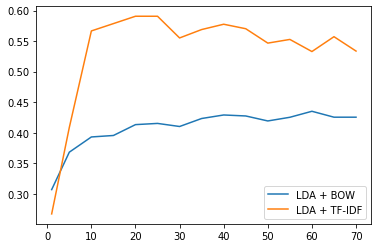

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#coherance_val_bow, coherence_val_tfidf,topicnums
plt.plot(topicnums,coherance_val_bow, label = 'LDA + BOW' )
plt.plot(topicnums,coherence_val_tfidf, label = 'LDA + TF-IDF' )
plt.legend()
plt.show()

In [ ]:
svd_coherence_bow = [0.29506118094227707,
 0.32741604257305734,
 0.3656936299167354,
 0.34821401017361503,
 0.31137669858440964,
 0.3188558997572673,
 0.29178490866273704,
 0.28525123340408204,
 0.286905309967944,
 0.2773425075253943,
 0.283770220388404,
 0.26903864235318126,
 0.27008488163150235,
 0.2629146136082968,
 0.26170011656740244]

In [ ]:
svd_coherence_tfidf = [0.3383365364146953,
 0.4296995053051453,
 0.4513375549894586,
 0.3974088635051966,
 0.3685745210805211,
 0.3469473912663723,
 0.346822855482052,
 0.346794575584143,
 0.36798150325631757,
 0.35159586913083174,
 0.3435026649681819,
 0.34848559224734005,
 0.3687433669948111,
 0.3741140625039322,
 0.37117680408748344]

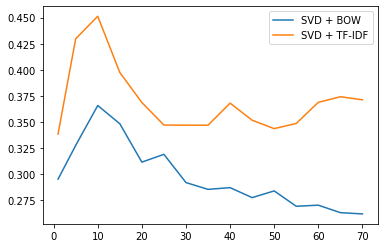

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#coherance_val_bow, coherence_val_tfidf,topicnums
plt.plot(topicnums,svd_coherence_bow, label = 'SVD + BOW' )
plt.plot(topicnums,svd_coherence_tfidf, label = 'SVD + TF-IDF' )
plt.legend()
plt.show()

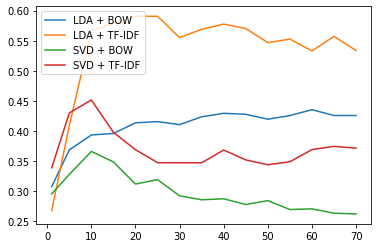

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#coherance_val_bow, coherence_val_tfidf,topicnums
plt.plot(topicnums,coherance_val_bow, label = 'LDA + BOW' )
plt.plot(topicnums,coherence_val_tfidf, label = 'LDA + TF-IDF' )
plt.plot(topicnums,svd_coherence_bow, label = 'SVD + BOW' )
plt.plot(topicnums,svd_coherence_tfidf, label = 'SVD + TF-IDF' )
plt.legend()
plt.show()